In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils
import datetime

aISDM = AISDataManager()

In [3]:
def convert_to_seconds(timeDel):
    return datetime.timedelta.total_seconds(timeDel)

In [4]:
srcDir = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/"
mMSIListFile = srcDir + 'VesselTrajCount.txt'
mMSIList = [line.rstrip('\n') for line in open(mMSIListFile)]

trajSOGMeanList = []
trajSOGMedianList = []
trajSOGStdList = []
trajLenList = []
trajDF = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTrajectories = 0
for mMSI in mMSIList[0:]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDir + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]
        
        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN
        
        trajLenList.append(trajLen)
        trajSOGMeanList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdList.append(ret[c.SOG_COL_NAME].std())
        
        trajDF = trajDF.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTrajectories = totalTrajectories + 1
        
trajSOGMeanList = np.array(trajSOGMeanList)
trajSOGMedianList = np.array(trajSOGMedianList)
trajSOGStdList = np.array(trajSOGStdList)
trajLenList = np.array(trajLenList)

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355745000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355745000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355745000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355745000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355861000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355861000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355861000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_4.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_26.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_16.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_32.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355322000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355322000_1.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357770000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_13.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212105000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212105000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477786900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477786900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_7.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_18.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477707000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366364000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366365000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_27.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356580000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356124000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356144000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356144000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685300_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685300_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685300_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356411000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477684600_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477684600_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477684600_2.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_4.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_3.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372345000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372345000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372346000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372348000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372348000_1.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210056000_0.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371987000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371987000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371987000_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372221000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372204000_0.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372097000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372089000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372089000_1.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373817000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373816000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373816000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373816000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373810000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373810000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373781000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373759000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373744000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_57.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_58.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373069000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373069000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373069000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373069000_3.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372829000_0.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372945000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372901000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372901000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372989000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373821000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373821000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_2.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_17.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370617000_0.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_57.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_58.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_6.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_0.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370030000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370011000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_7.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_21.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371487000_0.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371427000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371427000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371706000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371706000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371706000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371706000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371697000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370993000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370993000_1.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371163000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_31.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_12.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_18.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_2.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477158700_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477158700_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477158700_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367093000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367093000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477141400_0.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_23.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477547100_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477522000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477520900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519900_8.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_23.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_0.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_40.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_11.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413165000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413165000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413165000_2.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431205000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_4.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_12.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374242000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210655000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374267000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374267000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374267000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374267000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374267000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374288000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441857000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441857000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441947000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477046800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477046800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477027500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477027500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023600_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023600_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023400_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020400_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431314000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_33.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432803000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432803000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432803000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432803000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432772000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432772000_1.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_11.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_12.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311063500_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311063500_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016168_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016106_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311072300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311072300_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311075300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_4.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_5.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_31.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016892_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309823000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309841000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309841000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309841000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309847000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309847000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016819_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016819_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_36.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_40.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_44.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_56.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040800_5.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_21.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_35.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566482000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566482000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566482000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566482000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_17.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212714000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212714000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212714000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212714000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212714000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_6.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_7.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_71.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_72.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_73.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_74.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_75.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_76.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_77.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_78.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_79.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_80.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_81.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_82.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_18.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_56.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_53.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_31.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_6.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_9.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_8.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_7.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013457_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013457_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013457_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013456_5.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011980_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011980_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011980_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011979_8.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_39.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235603000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235603000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235603000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235603000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_7.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091078_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091078_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_2.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_13.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235088041_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805554_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805554_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_4.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091506_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091506_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091506_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091506_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091452_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091452_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_102.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_103.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_104.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_105.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_106.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_107.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_108.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_109.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_110.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_111.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_112.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_13.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247255300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247279500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247279500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247279500_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247279500_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247279500_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/246662000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091188_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247313300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247324400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248166000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248166000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_66.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_67.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_68.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_69.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_70.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_71.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_72.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_73.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_74.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_75.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_76.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_77.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_27.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_24.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_22.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/269075000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/269095000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/271000620_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/271000666_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/271042510_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/271042510_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/271042510_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017581_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017559_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017559_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017559_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017526_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017062_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017062_1.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305533000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305730000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305740000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305757000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305757000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305824000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305853000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305854000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305854000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305855000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305856000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305859000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256938000_3.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017807_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017807_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259885000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259885000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017767_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017767_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_11.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257627000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257627000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257661000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_8.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212301000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212301000_1.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_18.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477897700_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351462000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_9.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_12.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_54.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_171.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_172.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_173.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_174.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_175.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_176.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_177.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_178.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_179.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_180.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_181.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_272.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_273.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_274.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_275.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_276.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_277.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_278.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_279.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_280.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_281.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_282.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004332_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004332_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004332_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_8.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004793_0.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_33.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003947_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353722000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353722000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353889000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353889000_1.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_14.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_14.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_29.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354713000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354713000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354421000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_5.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_12.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352407000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352407000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352407000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352448000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352448000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351780000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351831000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_7.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352955000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352955000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352960000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352981000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352981000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352981000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352981000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_4.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352798000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352801000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352801000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352804000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352804000_1.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_14.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_7.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007194_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007194_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007106_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007093_0.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229258000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229218000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090151_5.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_17.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564910000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564910000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565029000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_6.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563262000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563251000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563251000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564254000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564254000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564254000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564254000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564254000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564203000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564086000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564086000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_13.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006170_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220206000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220206000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220206000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005708_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005487_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006425_0.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_15.csv
/home/jcha

In [5]:
destFile = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1004.csv"
print(trajDF)
aISDM.save_data_to_csv(trajDF, destFile)

            MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0      355745000        0   725.950000  15.160903       16.10  1.931336   
1      355745000        1  1296.166667   8.899553        9.00  0.857530   
2      355745000        2   705.400000  15.576110       16.10  1.462801   
3      355745000        3   826.450000  15.576268       16.40  1.875382   
4      355861000        0   258.500000  17.223502       17.20  0.214197   
5      355861000        1   239.466667  10.875120       10.60  2.064478   
6      355861000        2   536.016667  16.176327       16.85  2.012012   
7      477655900        0   118.000000   9.502857        9.60  0.232651   
8      477655900        1   514.833333   9.919182        9.90  0.195502   
9      477655900        2   493.316667  10.287204       10.30  0.263319   
10     477655900        3   149.500000  10.334615       10.30  0.117276   
11     477655900        4   138.816667  10.123423       11.60  3.137803   
12     477655900        5

0

In [6]:
print(totalTrajectories)

17752


In [7]:
month1TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 1]
month2TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 2]
month3TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 3]
month4TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 4]
month5TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 5]
month6TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 6]
month7TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 7]
month8TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 8]
month9TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 9]
month10TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 10]
month11TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 11]
month12TrajDF = trajDF.loc[trajDF['TRAJ_MON'] == 12]

In [8]:
#mean of sog_mean
seasonalSOG = [ \
    month1TrajDF['SOG_MEAN'].mean() \
    , month2TrajDF['SOG_MEAN'].mean() \
    , month3TrajDF['SOG_MEAN'].mean() \
    , month4TrajDF['SOG_MEAN'].mean() \
    , month5TrajDF['SOG_MEAN'].mean() \
    , month6TrajDF['SOG_MEAN'].mean() \
    , month7TrajDF['SOG_MEAN'].mean() \
    , month8TrajDF['SOG_MEAN'].mean() \
    , month9TrajDF['SOG_MEAN'].mean() \
    , month10TrajDF['SOG_MEAN'].mean() \
    , month11TrajDF['SOG_MEAN'].mean() \
    , month12TrajDF['SOG_MEAN'].mean() \
]

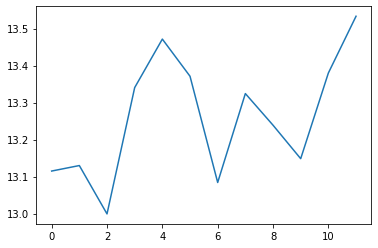

In [9]:
plt.plot(seasonalSOG)

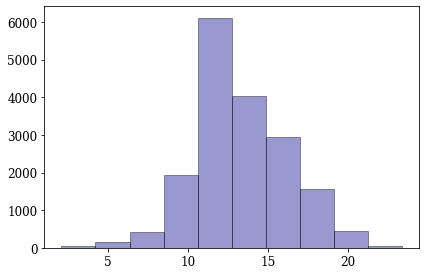

In [10]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

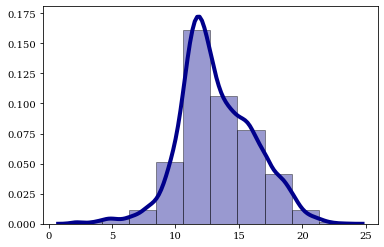

In [11]:
sns.distplot(trajSOGMeanList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [12]:
print(trajSOGMeanList.min())
print(trajSOGMeanList.max())
print(trajSOGMeanList.mean())
print(trajSOGMeanList.std())

2.059375
23.438514680483593
13.26081950986717
2.930559534442391


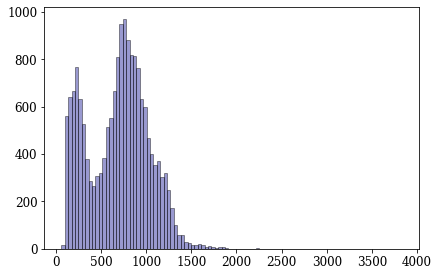

In [13]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [14]:
print(trajLenList.min())
print(trajLenList.max())
print(trajLenList.mean())
print(trajLenList.std())

62.68333333333333
3836.383333333333
691.8487841745531
338.7919504383323


In [15]:
trajLenShort = (trajLenList <= 90)
print(np.sum(trajLenShort))

6


In [16]:
trajLenLong = (trajLenList > 2000)
print(np.sum(trajLenLong))

12


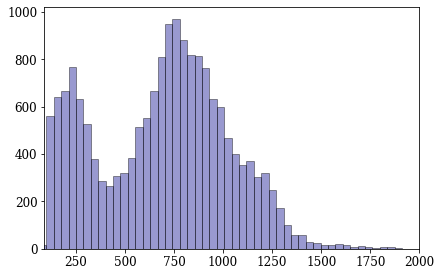

In [17]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.xlim(90,2000)

sns.distplot(trajLenList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [18]:
trajLenAtLeast90Long = (trajLenList > 90)
print("Number of cargo tracks having length of atleast 90 minutes =", np.sum(trajLenAtLeast90Long))
trajLenAtLeast120Long = (trajLenList > 120)
print("Number of cargo tracks having length of atleast 120 minutes =", np.sum(trajLenAtLeast120Long))
trajLenAtLeast300Long = (trajLenList > 300)
print("Number of cargo tracks having length of atleast 300 minutes =", np.sum(trajLenAtLeast300Long))

Number of cargo tracks having length of atleast 90 minutes = 17746
Number of cargo tracks having length of atleast 120 minutes = 17452
Number of cargo tracks having length of atleast 300 minutes = 14326


In [19]:
srcDirTanker = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/"
mMSIListFileTanker = srcDirTanker + 'VesselTrajCount.txt'
mMSIListTanker = [line.rstrip('\n') for line in open(mMSIListFileTanker)]

trajSOGMeanTankerList = []
trajSOGMedianTankerList = []
trajSOGStdTankerList = []
trajLenTankerList = []

trajDFTanker = pd.DataFrame(columns=['MMSI' \
                               , 'TRAJ_NUM' \
                               , 'TRAJ_TIME' \
                               , 'SOG_MEAN' \
                               , 'SOG_MEDIAN' \
                               , 'SOG_STD' \
                               , 'TRAJ_MON' \
                               , 'TRAJ_YEAR' \
                               , ])

totalTankerTrajectories = 0
for mMSI in mMSIListTanker[0:]:
    vesselName, numTrajs, _ = mMSI.split("-")
    for traj in range(int(numTrajs)):
        vesselFileName = srcDirTanker + vesselName + '_' + str(traj) + '.csv'
        print(vesselFileName)
        ret, _ = aISDM.load_data_from_csv(vesselFileName) 
        ret = aISDM.formate_time(ret,'DateTime')
        trajInitT = ret['DateTime'][0]
        trajEndT = ret['DateTime'][ret['DateTime'].shape[0]-1]

        trajLen = convert_to_seconds(trajEndT - trajInitT)/timeUtils.NUM_SEC_IN_MIN

        trajLenTankerList.append(trajLen)
        trajSOGMeanTankerList.append(ret[c.SOG_COL_NAME].mean())
        trajSOGMedianTankerList.append(ret[c.SOG_COL_NAME].median())
        trajSOGStdTankerList.append(ret[c.SOG_COL_NAME].std())
        
        trajDFTanker = trajDFTanker.append({'MMSI':vesselName \
                                ,'TRAJ_NUM':traj \
                                ,'TRAJ_TIME':trajLen \
                                ,'SOG_MEAN':ret[c.SOG_COL_NAME].mean() \
                                ,'SOG_MEDIAN':ret[c.SOG_COL_NAME].median() \
                                ,'SOG_STD':ret[c.SOG_COL_NAME].std() \
                                ,'TRAJ_MON':trajInitT.month \
                                ,'TRAJ_YEAR':trajInitT.year \
                               } \
                                , ignore_index= True)
        
        totalTankerTrajectories = totalTankerTrajectories + 1
        
trajSOGMeanTankerList = np.array(trajSOGMeanTankerList)
trajSOGMedianTankerList = np.array(trajSOGMedianTankerList)
trajSOGStdTankerList = np.array(trajSOGStdTankerList)
trajLenTankerList = np.array(trajLenTankerList)

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241132000_11.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565152000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/209394000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/241147000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565343000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565343000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565018000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/565018000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/564936000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369272000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369272000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369272000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/369272000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310427000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016693_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016695_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016696_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636016696_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310409000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310409000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/310409000_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/308275000_28.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000136_17.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_54.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_55.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_57.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_58.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_59.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_60.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_61.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_62.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_63.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_154.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_155.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_156.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_157.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_158.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_159.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_160.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_161.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_162.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_163.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_164.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_284.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_285.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_286.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_287.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_288.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_289.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_290.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_291.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_292.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_293.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_294.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_383.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_384.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_385.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_386.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000112_387.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_6.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_94.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_95.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_96.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_97.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_98.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_99.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_100.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_101.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_102.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_103.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_104.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_105.cs

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_195.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_196.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_197.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_198.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_199.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_200.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_201.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_202.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_203.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_204.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_205.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_295.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_296.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_297.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_298.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_299.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_300.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_301.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_302.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_303.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_304.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_305.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311000111_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257142000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257142000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/257005000_9.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/258444000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/258444000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/303294000_9.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017857_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017858_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/259810000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636017987_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013615_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/247230300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/319479000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/319459000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/319459000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636013816_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_90.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_91.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_92.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_93.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_94.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_95.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/368127000_96.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566428000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566479000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566554000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566554000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/566554000_2.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311538000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311538000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311538000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311538000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311499000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311125000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311125000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/311069200_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636015174_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636092000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636091999_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636091999_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636091999_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/636091999_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/338500000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002089_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002090_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002090_1.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353992000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353525000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353491000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/353491000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002269_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002269_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002269_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002269_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/357736000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/357736000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002271_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003526_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003490_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003490_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003490_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003439_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003439_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538003439_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002663_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240126000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240126000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240126000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538002693_0.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367067110_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477141500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477141500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/220565000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/220565000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477211400_1.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_40.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367353080_47.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/229640000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477786500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477786500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477786500_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477786500_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477786500_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/735057548_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235084182_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477534400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477534800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477534900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/477547300_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_40.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_155.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_156.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_157.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_158.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_159.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_160.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_161.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_162.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_163.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_164.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_165.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/367457000_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/235076283_22.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122014_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122014_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122014_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122014_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122014_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/642122009_6.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_101.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_102.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_103.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_104.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_105.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_106.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_107.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_108.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_109.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_110.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_111.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366962000_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_40.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/366948190_44.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006844_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/371144000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/371144000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006890_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006896_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006946_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006946_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007001_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007001_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007126_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006542_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006542_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006545_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538007512_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006196_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006196_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563170000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563170000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/563170000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/370731000_8.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004168_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006180_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006168_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006168_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004967_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004967_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004967_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004968_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004968_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004992_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004992_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/372101000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004486_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004486_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004535_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004536_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004539_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004539_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004539_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240561000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240561000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/240561000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004593_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538004593_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006006_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006053_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006053_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006053_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006053_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006068_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006068_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006068_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006068_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006070_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006070_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1024/538006070_2.csv
/home/jcharla/Li

In [20]:
destFileTanker = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1024.csv"
print(trajDFTanker)
aISDM.save_data_to_csv(trajDFTanker, destFileTanker)

           MMSI TRAJ_NUM    TRAJ_TIME   SOG_MEAN  SOG_MEDIAN   SOG_STD  \
0     241132000        0   410.516667  11.074719       11.10  0.331163   
1     241132000        1  1108.833333  11.416632       11.50  0.339299   
2     241132000        2  1099.183333  11.668898       11.60  0.364481   
3     241132000        3   254.500000  11.174439       11.00  0.415598   
4     241132000        4   429.850000  10.641176       10.70  0.285981   
5     241132000        5   950.150000  12.039781       12.10  0.761009   
6     241132000        6  1076.333333  11.917368       12.00  0.640760   
7     241132000        7   439.983333  11.857743       12.00  0.521863   
8     241132000        8   984.683333  12.816366       13.00  0.567214   
9     241132000        9   416.500000  11.092090       11.10  0.206946   
10    241132000       10   450.333333  12.635598       12.90  0.794641   
11    241132000       11   163.516667  11.107299       11.10  0.208155   
12    241132000       12   157.366667 

0

In [21]:
print(totalTankerTrajectories)

4678


In [22]:
month1TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 1]
month2TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 2]
month3TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 3]
month4TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 4]
month5TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 5]
month6TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 6]
month7TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 7]
month8TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 8]
month9TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 9]
month10TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 10]
month11TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 11]
month12TrajTankerDF = trajDFTanker.loc[trajDFTanker['TRAJ_MON'] == 12]

In [23]:
seasonalTankerSOG = [ \
    month1TrajTankerDF['SOG_MEAN'].mean() \
    , month2TrajTankerDF['SOG_MEAN'].mean() \
    , month3TrajTankerDF['SOG_MEAN'].mean() \
    , month4TrajTankerDF['SOG_MEAN'].mean() \
    , month5TrajTankerDF['SOG_MEAN'].mean() \
    , month6TrajTankerDF['SOG_MEAN'].mean() \
    , month7TrajTankerDF['SOG_MEAN'].mean() \
    , month8TrajTankerDF['SOG_MEAN'].mean() \
    , month9TrajTankerDF['SOG_MEAN'].mean() \
    , month10TrajTankerDF['SOG_MEAN'].mean() \
    , month11TrajTankerDF['SOG_MEAN'].mean() \
    , month12TrajTankerDF['SOG_MEAN'].mean() \
]

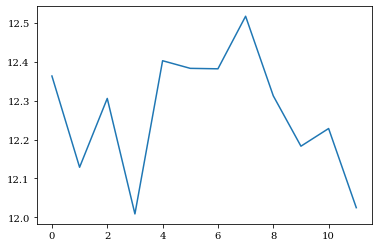

In [24]:
plt.plot(seasonalTankerSOG)

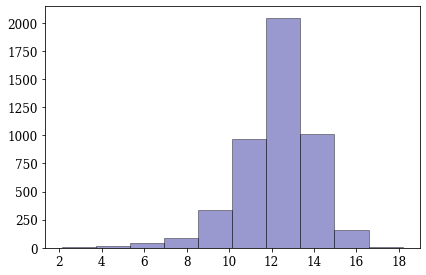

In [25]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=False \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

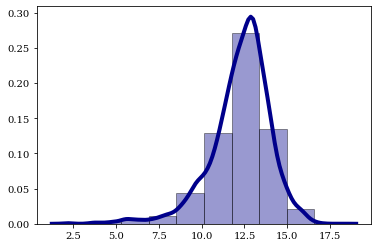

In [26]:
sns.distplot(trajSOGMeanTankerList \
             , hist=True \
             , kde=True \
             , bins = 10 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [27]:
print(trajSOGMeanTankerList.min())
print(trajSOGMeanTankerList.max())
print(trajSOGMeanTankerList.mean())
print(trajSOGMeanTankerList.std())

2.108064516129032
18.177474402730375
12.275983905439585
1.7612604318360063


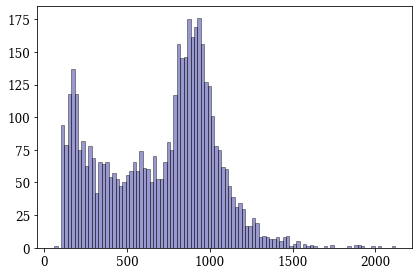

In [28]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()

sns.distplot(trajLenTankerList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [29]:
print(trajLenTankerList.min())
print(trajLenTankerList.max())
print(trajLenTankerList.mean())
print(trajLenTankerList.std())

59.18333333333333
2118.65
697.1511258372524
336.7112915627993


In [30]:
trajLenShortTanker = (trajLenTankerList <= 90)
print(np.sum(trajLenShortTanker))

1


In [31]:
trajLenLongTanker = (trajLenTankerList > 1800)
print(np.sum(trajLenLongTanker))

9


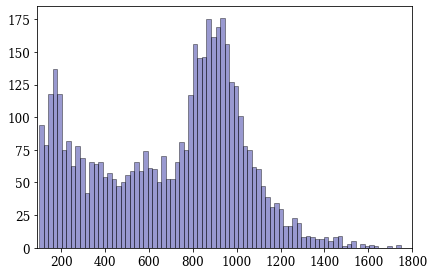

In [32]:
plt.rc('font',family='serif')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.xlim(90,1800)

sns.distplot(trajLenTankerList \
             , hist=True \
             , kde=False \
             , bins = 100 \
             , color = 'darkblue' \
             , hist_kws = {'edgecolor':'black'} \
             , kde_kws = {'linewidth': 4} \
            )

In [33]:
trajLenAtLeast90LongTanker = (trajLenTankerList > 90)
print("Number of tanker tracks having length of atleast 90 minutes =", np.sum(trajLenAtLeast90LongTanker))
trajLenAtLeast120LongTanker = (trajLenTankerList > 120)
print("Number of tanker tracks having length of atleast 120 minutes =", np.sum(trajLenAtLeast120LongTanker))
trajLenAtLeast300LongTanker = (trajLenTankerList > 300)
print("Number of tanker tracks having length of atleast 300 minutes =", np.sum(trajLenAtLeast300LongTanker))

Number of tanker tracks having length of atleast 90 minutes = 4677
Number of tanker tracks having length of atleast 120 minutes = 4590
Number of tanker tracks having length of atleast 300 minutes = 3779


In [35]:
np.sum(trajLenAtLeast300LongTanker) + np.sum(trajLenAtLeast300Long)

18105